<a href="https://colab.research.google.com/github/Dulon18/Machine_Learning_project/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dataset Details**

**Age:** age of the patient [years]

**Sex:**sex of the patient [M: Male, F: Female]

**ChestPainType**: chest pain type [TA: Typical 
Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

**RestingBP:** resting blood pressure [mm Hg]

**Cholesterol:** serum cholesterol [mm/dl]

**FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]


**RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

**MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]

**ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]

**Oldpeak:** oldpeak = ST [Numeric value measured in depression]

**ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

**HeartDisease:** output class [1: heart disease, 0: Normal]

# **Importing Libraries**

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn import metrics

import seaborn as sns
import pandas as pd
import numpy as np

In [111]:
dataset = pd.read_csv("/content/drive/MyDrive/Heart_Failure_Prediction/heart.csv")

In [112]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [113]:
dataset.shape

(918, 12)

In [114]:
dataset["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [115]:
dataset["FastingBS"].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [116]:
dataset["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [117]:
dataset["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [118]:
dataset["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [119]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [120]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [121]:
#statistical info..

dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# **Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


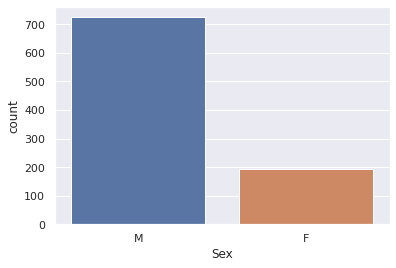

In [122]:
sns.set()
sns.countplot(dataset['Sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


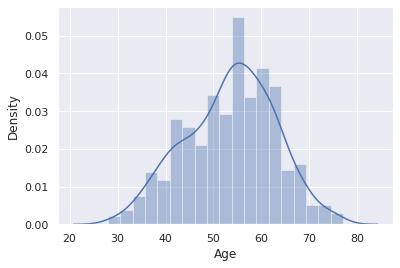

In [123]:
# finding distribution of Age column
print(sns.distplot(dataset['Age']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


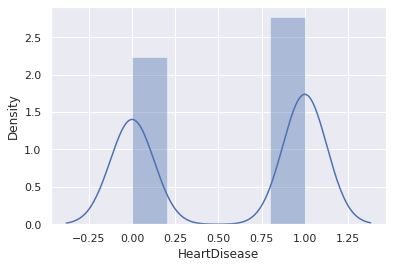

In [124]:
# finding distribution of Age column
print(sns.distplot(dataset['HeartDisease']))

In [125]:
# Finding Correlation in the dataset

correlation =dataset.corr()

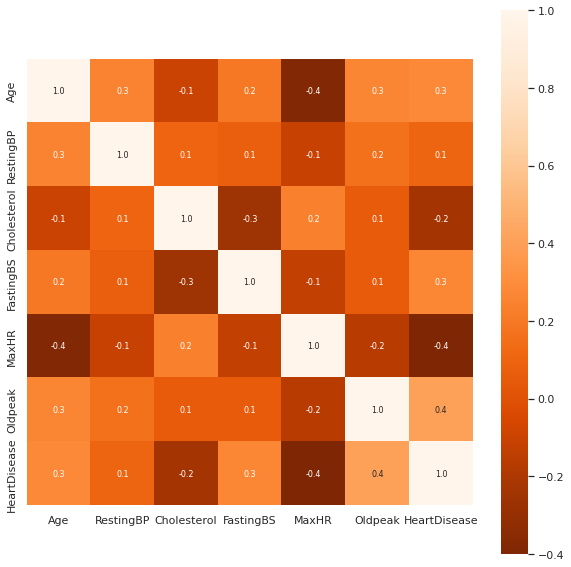

In [126]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,
            annot_kws={'size':8},cmap="Oranges_r")

# **Data Processing**

In [127]:

#Converting text to numerical values
dataset.replace({'Sex':{'M':0,'F':1}},inplace=True)


In [128]:
dataset.replace({'ExerciseAngina':{'N':0,'Y':1}},inplace=True)

In [129]:
dataset.replace({'ChestPainType':{'ATA':0,'NAP':1, 'ASY':2 , 'TA':3}},inplace=True)

In [130]:
dataset.replace({'RestingECG':{'Normal':0,'LVH':1, 'ST':2}},inplace=True)

In [131]:
dataset.replace({'ST_Slope':{'Up':0,'Flat':1, 'Down':2}},inplace=True)

In [132]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,2,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


# **Separating Target**

In [133]:
x = dataset.drop(columns=['HeartDisease'])
y=dataset['HeartDisease']


In [134]:
print(x,y)

     Age  Sex  ChestPainType  ...  ExerciseAngina  Oldpeak  ST_Slope
0     40    0              0  ...               0      0.0         0
1     49    1              1  ...               0      1.0         1
2     37    0              0  ...               0      0.0         0
3     48    1              2  ...               1      1.5         1
4     54    0              1  ...               0      0.0         0
..   ...  ...            ...  ...             ...      ...       ...
913   45    0              3  ...               0      1.2         1
914   68    0              2  ...               0      3.4         1
915   57    0              2  ...               1      1.2         1
916   57    1              0  ...               0      0.0         1
917   38    0              1  ...               0      0.0         0

[918 rows x 11 columns] 0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


In [136]:
#spliting test and training data
x_train,x_test,y_train,y_test = train_test_split(x.values,y.values,test_size=0.2,random_state=2)

print(x.shape,x_train.shape,x_test.shape)

(918, 11) (734, 11) (184, 11)


# **Train Model**

In [161]:
from sklearn.ensemble import RandomForestRegressor

In [170]:
model=XGBRegressor()

In [162]:
#model=RandomForestRegressor()

In [171]:
#training the model
model.fit(x_train,y_train)

[15:18:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [172]:
x_train_prediction=model.predict(x_train)

print(x_train_prediction)

[ 9.72487330e-01  7.09497929e-03  9.84167695e-01  9.97125149e-01
  8.33294630e-01  1.36124790e-01  8.85182619e-02  8.69025111e-01
  1.96162850e-01  8.29715848e-01  5.85439205e-02  8.57110023e-01
  6.58083022e-01  2.93491393e-01  8.61505508e-01 -8.14386606e-02
  9.60728407e-01  9.86101866e-01  8.09799492e-01  5.21533310e-01
  7.62857318e-01  9.64935899e-01 -5.97956181e-02  1.88253641e-01
  9.34069753e-01  3.68006080e-01  1.14234954e-01  9.88485456e-01
  3.86265308e-01  3.32538188e-02  9.81919885e-01  2.00645447e-01
  9.89931822e-01  9.51525867e-01  7.13861883e-01  3.77230048e-02
  9.11967516e-01  9.72029924e-01  8.66558373e-01  2.43272573e-01
  4.50800359e-02 -8.76647234e-03  7.82123327e-01  9.78297293e-01
  9.00135934e-02  8.97800207e-01 -3.74232531e-02 -2.48019695e-02
  2.76601911e-02  5.21747351e-01  3.06891263e-01  7.63878942e-01
  9.20421779e-02  1.09247029e-01  1.30145639e-01  5.35856307e-01
  9.02921319e-01  9.49082136e-01  1.38652623e-02  6.19230688e-01
  3.31786335e-01  7.67647

# **Evaluation---->part**

In [173]:

#Prediction

test_data_prediction=model.predict(x_test)
print(test_data_prediction)


[ 3.99891526e-01  9.57519233e-01  9.42831874e-01  2.77086526e-01
  9.37871516e-01  9.32165742e-01 -8.42787623e-02  3.68070364e-01
  2.87088454e-02  1.04660916e+00  8.57400715e-01  4.51390147e-01
  9.58888173e-01  8.70369077e-01  9.93267775e-01  1.98480487e-01
  4.10824835e-01  9.44405854e-01  1.07975781e+00  5.39751530e-01
  2.14552760e-01  5.90065718e-01 -5.52545786e-02  7.48220801e-01
  9.94367719e-01  3.54052782e-01  9.44661498e-01  2.37437516e-01
 -8.14648867e-02  1.00058198e+00  7.52431512e-01  1.00838315e+00
  1.78946763e-01  7.72768736e-01  5.94749153e-02  2.00773388e-01
 -1.20292306e-02  1.99672371e-01  5.40783226e-01 -8.53922963e-02
  1.02101445e+00  8.88809443e-01  6.10144734e-01  4.19445872e-01
  1.00008094e+00  7.29990959e-01  9.94488955e-01 -7.50660896e-04
  6.53319061e-02 -1.72731519e-01  1.45780593e-01  4.32597995e-02
  6.39251173e-02  1.05182195e+00 -2.99947262e-02  9.31902528e-01
  9.57449079e-01 -1.28756762e-02 -1.12528801e-02  2.36398280e-02
  8.07968855e-01  3.14393

# **Mean Absolute Error**

In [174]:
m = metrics.mean_absolute_error(y_test,test_data_prediction)

print("Mean Absolute Error : ",m)

Mean Absolute Error :  0.2310485585552195


In [175]:
# R squared value
r2_test = metrics.r2_score(y_test,test_data_prediction)
print('R squared value : ',r2_test)

R squared value :  0.5497838350594944


In [176]:
#input_data=[48,1,2,138,214,0,0,108,1,1.5,1]
input_data=[37,0,0,130,283,0,2,98,0,0.0,0]
input_data_as_numpy_array = np.asarray(input_data)

In [180]:
#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction =model.predict(input_data_reshaped)
x=round(prediction[0])

print('Heart Disease Prediction value : ',x,'\n')

if (x == 0 ):
    print(" This Person is Normal")
else:
     print("This Person has HeartDisease")


Heart Disease Prediction value :  0 

 This Person is Normal
